# Airline Passenger Satisfaction Analysis

## Table of Contents
1. [Project Overview](#project-overview)
2. [Data Preprocessing](#data-preprocessing)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Feature Engineering](#feature-engineering)
5. [Model Training](#model-training)
6. [Model Evaluation](#model-evaluation)

## Project Overview
This project analyzes airline passenger satisfaction using machine learning techniques. The goal is to predict passenger satisfaction based on various flight and service-related features.

## Data Preprocessing

### Data Loading and Initial Exploration

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

#### Initial Data Exploration

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
df.shape

(103904, 25)

### Handling Missing Values

In [7]:
missing_values = df.isnull().sum()
missing_values

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

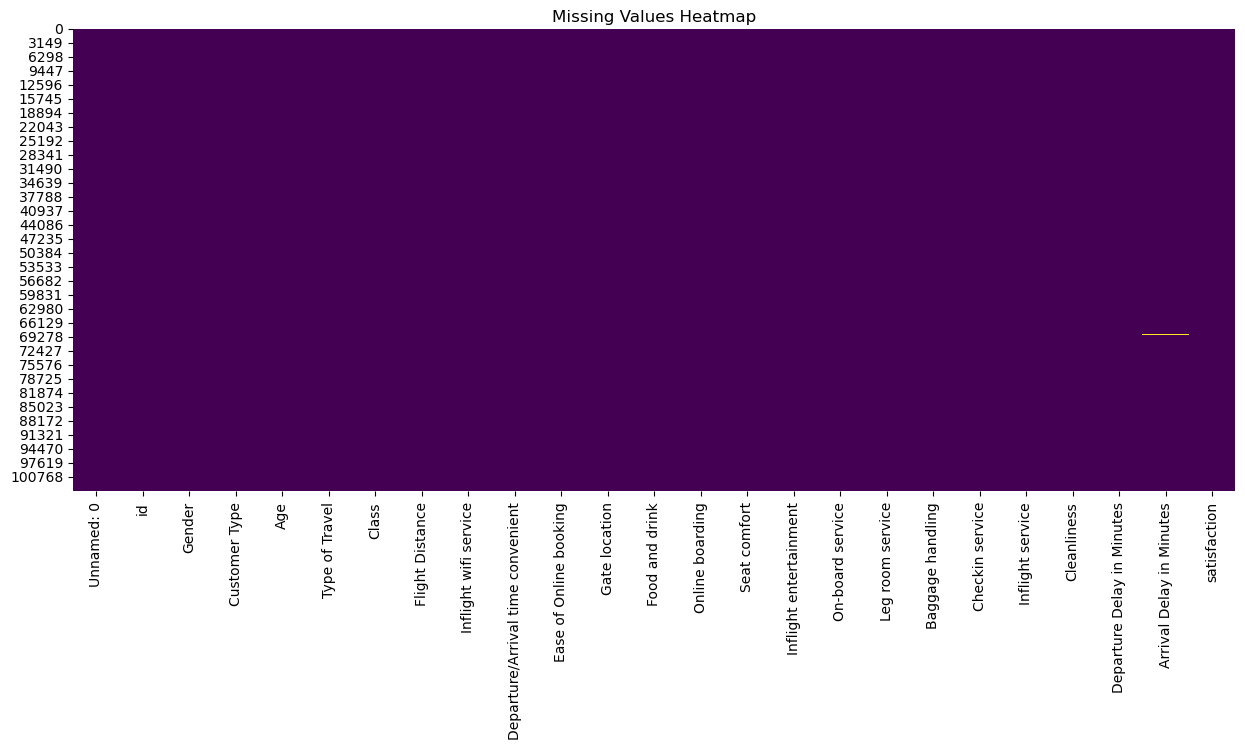

In [9]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
# Missing values percentage
percentage = missing_values / df.shape[0] * 100
percentage

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

So, only 0.2983 percent of the entire column is missing. Therefore we can easily drop them for convenience. Also `Unnamed: 0` and `id` columns doesn't add any values to the problem, so we'll drop them too.

In [11]:
df = df.dropna()
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

### Feature Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

cat_cols = ['Type of Travel', 'Customer Type', 'Class', 'satisfaction']
oh_col = ['Gender']

encoding_dict = {}
le = LabelEncoder()
oh = OneHotEncoder(sparse_output=False, drop='first')

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))
    encoding_dict[col] = dict(zip(le.classes_, range(len(le.classes_))))

encoded_data = oh.fit_transform(df[oh_col])
encoded_df = pd.DataFrame(encoded_data, columns=oh.get_feature_names_out(oh_col))

df = df.drop(columns=oh_col).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

print("\nEncoding Mappings:")
for col, mapping in encoding_dict.items():
    print(f"{col}: {mapping}")

df.head()



Encoding Mappings:
Type of Travel: {'Business travel': 0, 'Personal Travel': 1}
Customer Type: {'Loyal Customer': 0, 'disloyal Customer': 1}
Class: {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
satisfaction: {'neutral or dissatisfied': 0, 'satisfied': 1}


,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male
0,0,13,1,2,460,3,4,3,1,5,...,4,3,4,4,5,5,25,18.0,0,1.0
1,1,25,0,0,235,3,2,3,3,1,...,1,5,3,1,4,1,1,6.0,0,1.0
2,0,26,0,0,1142,2,2,2,2,5,...,4,3,4,4,4,5,0,0.0,1,0.0
3,0,25,0,0,562,2,5,5,5,2,...,2,5,3,1,4,2,11,9.0,0,0.0
4,0,61,0,0,214,3,3,3,3,4,...,3,4,4,3,3,3,0,0.0,1,1.0


## Exploratory Data Analysis

### Visualization Techniques

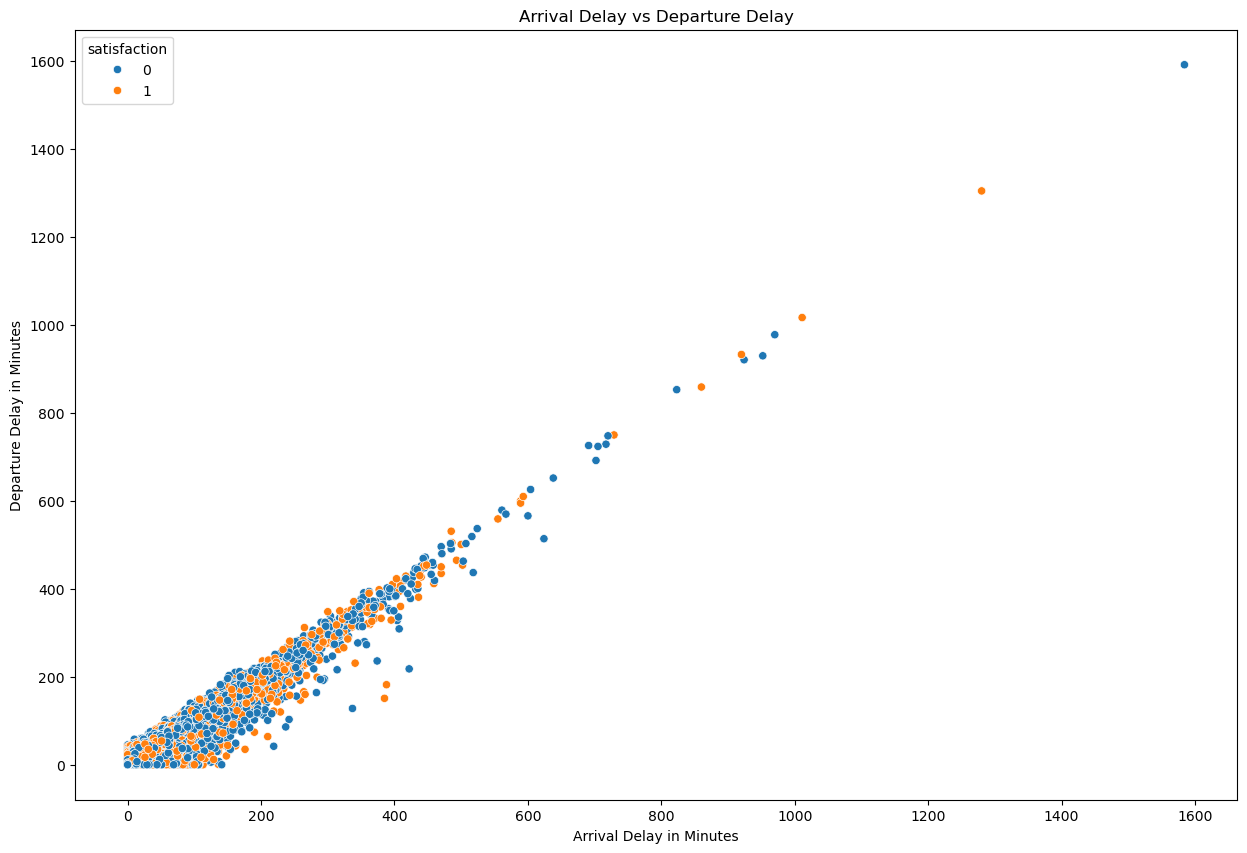

In [14]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='Arrival Delay in Minutes', y='Departure Delay in Minutes', hue='satisfaction')
plt.title('Arrival Delay vs Departure Delay')
plt.show()

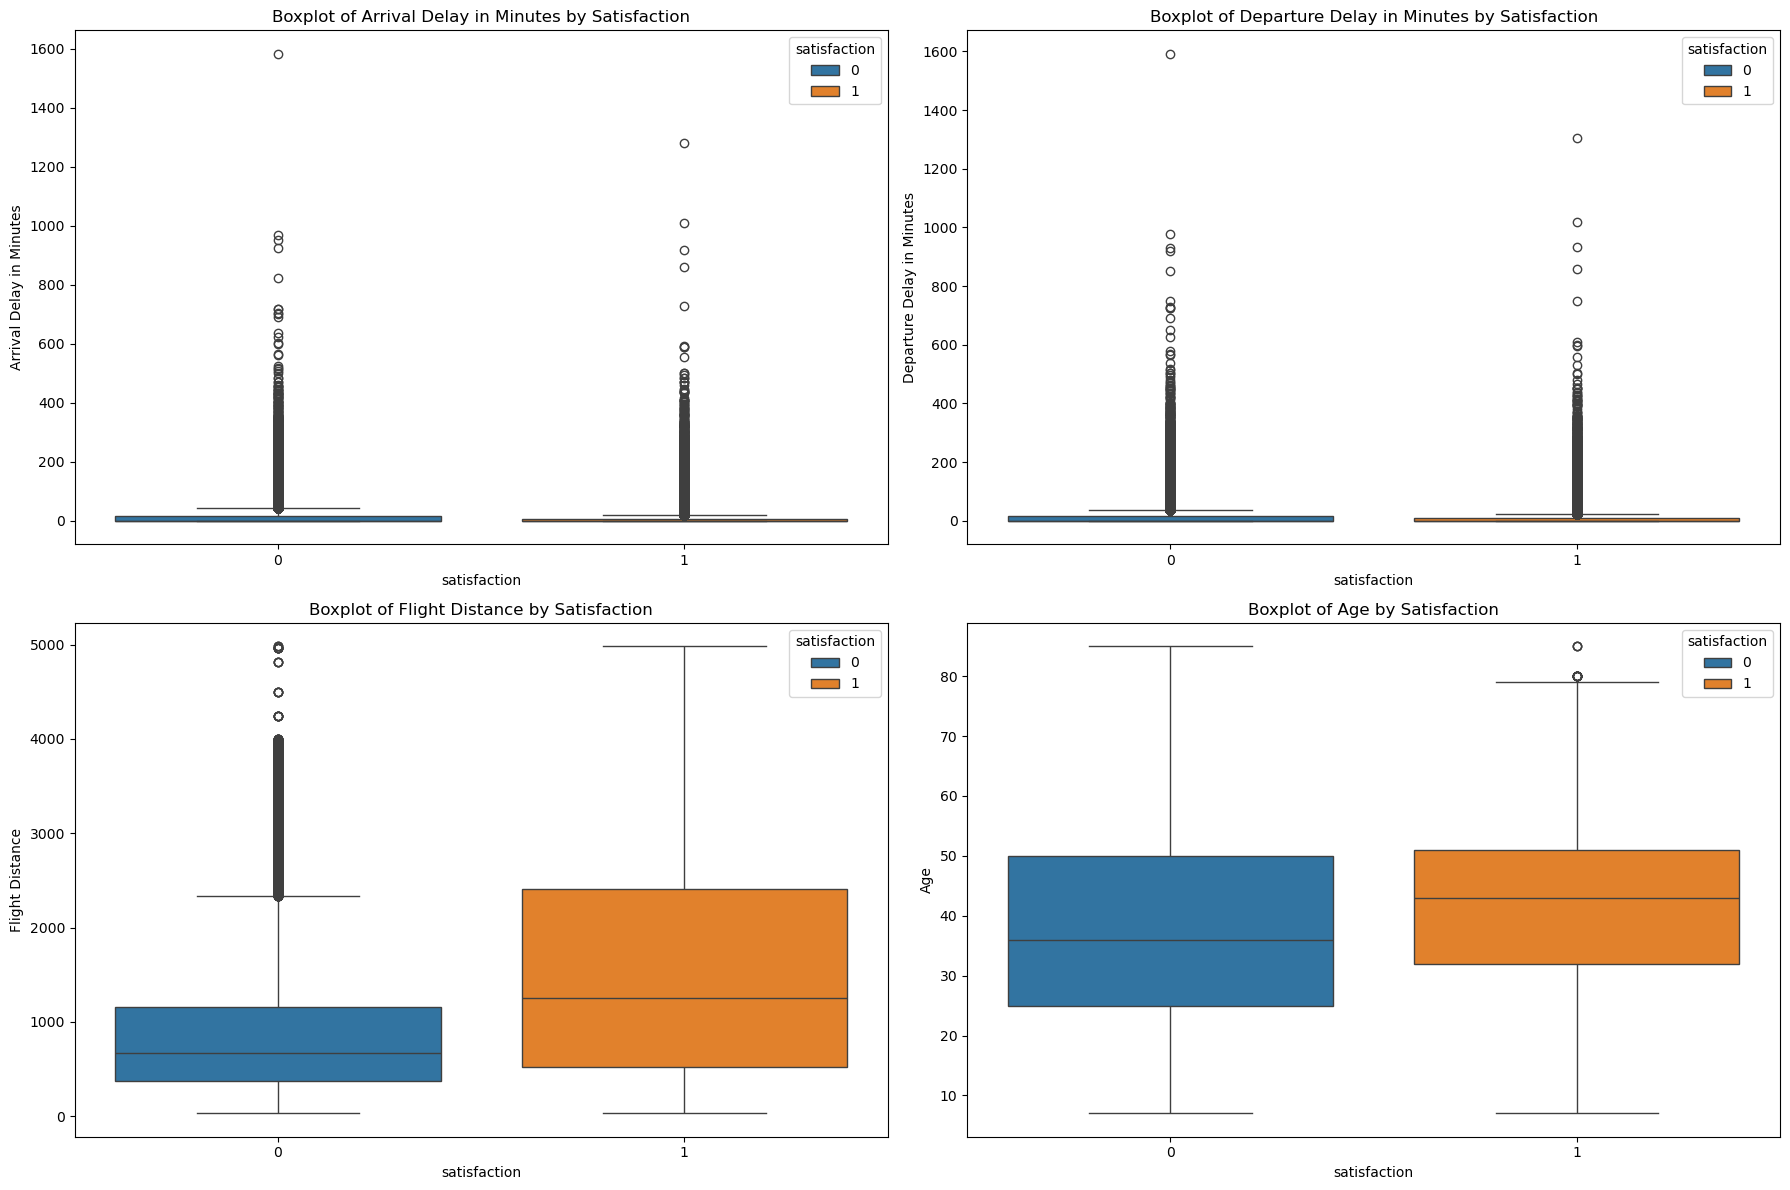

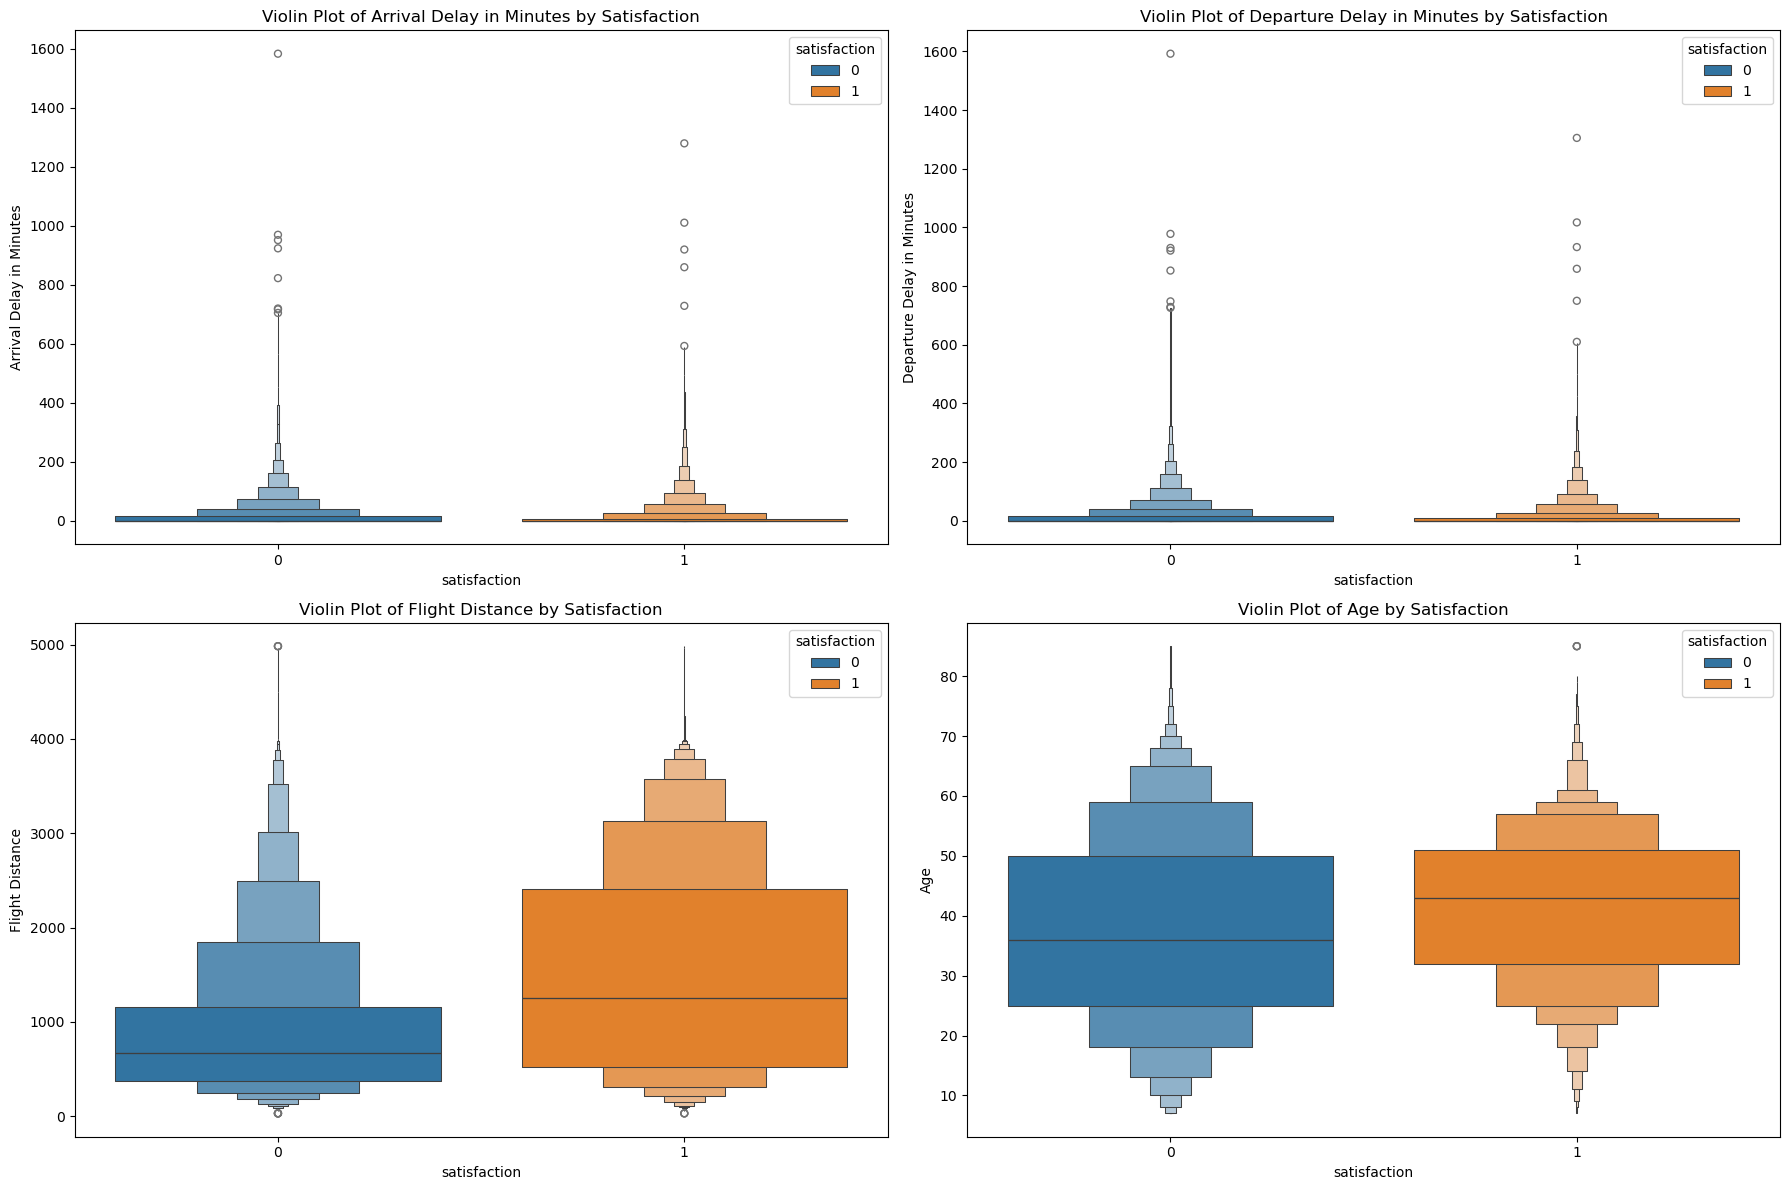

In [15]:
features = df[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age', 'satisfaction']]
plt.figure(figsize=(18, 12))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='satisfaction', y=column, data=features, hue='satisfaction')
    plt.title(f'Boxplot of {column} by Satisfaction')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 12))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxenplot(x='satisfaction', y=column, data=features, hue='satisfaction')
    plt.title(f'Violin Plot of {column} by Satisfaction')
plt.tight_layout()
plt.show()


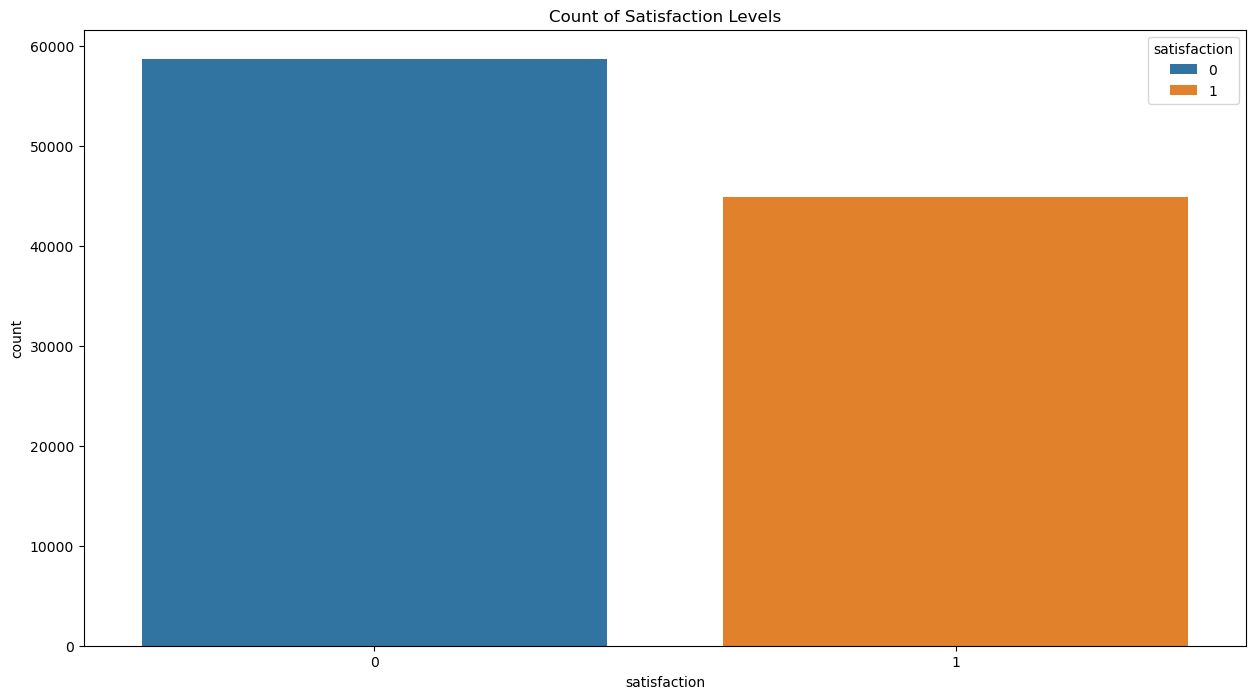

In [16]:
plt.figure(figsize=(15, 8))
sns.countplot(x='satisfaction', data=features, hue='satisfaction')
plt.title('Count of Satisfaction Levels')
plt.show()


### Distribution Analysis

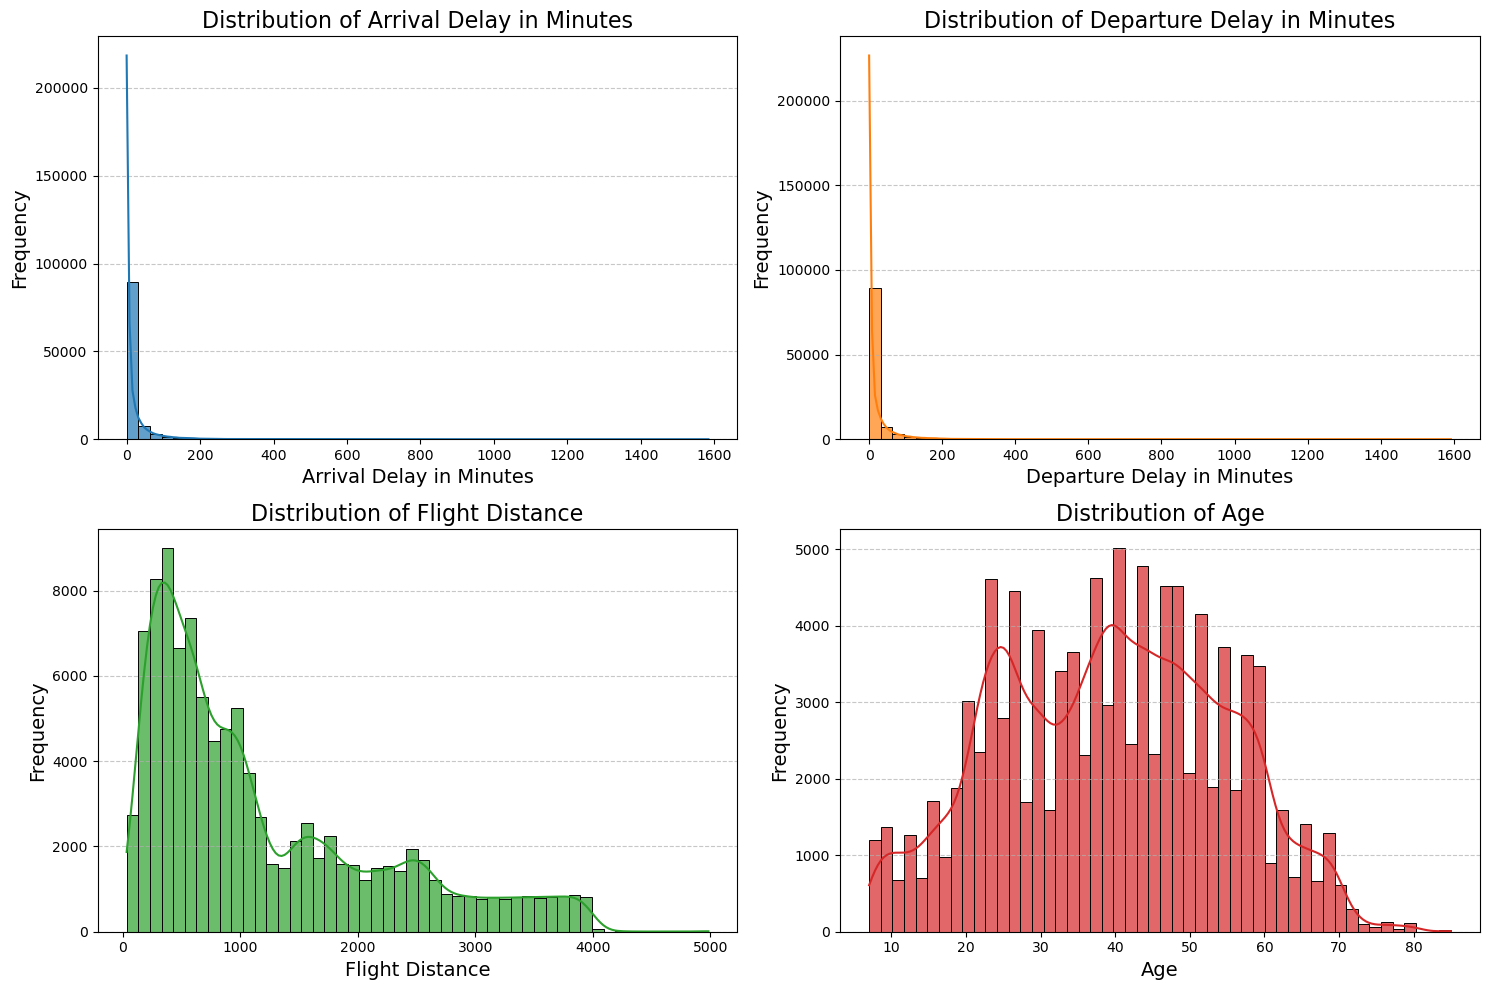

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette(n_colors=len(features.columns)-1)

plt.figure(figsize=(15, 10))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(features[column], kde=True, bins=50, color=palette[i-1], alpha=0.7)
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Observations:
- `Arrival Delay in Minutes`, `Departure Delay in Minutes` & `Flight Distance` columns are skewed.
- `Age` column needs to be binned.

In [18]:
# sns.pairplot(features, hue='satisfaction', diag_kind='kde', markers=["o", "o"])
# plt.suptitle('Pairplot with KDE and Different Markers', y=1.02)
# plt.show()

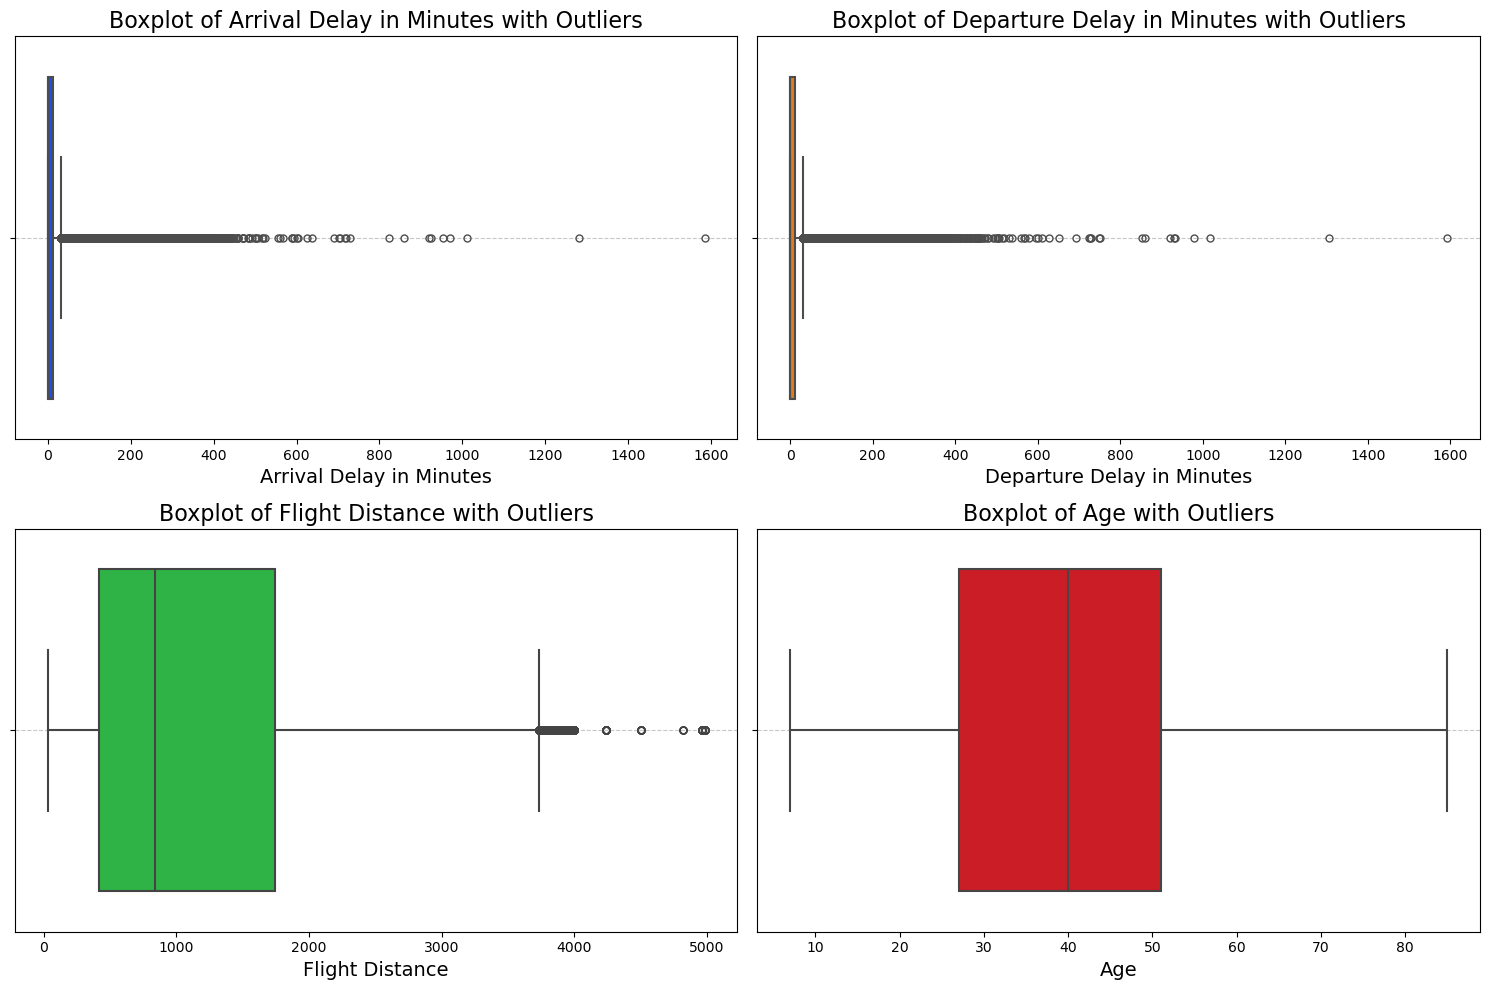

In [19]:
features = df[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age', 'satisfaction']]


palette = sns.color_palette('bright', n_colors=len(features.columns)-1)

Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))

plt.figure(figsize=(15, 10))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=features[column], color=palette[i-1], fliersize=5, linewidth=1.5)
    plt.title(f'Boxplot of {column} with Outliers', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [20]:
# features = df[['Class', 'Type of Travel', 'Seat comfort', 'Inflight entertainment', 'Online boarding', 'Customer Type', 'Inflight wifi service', 'satisfaction']]

# sns.pairplot(features, hue='satisfaction')

In [21]:
# features = df[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age', 'satisfaction']]

# sns.pairplot(features, hue='satisfaction')

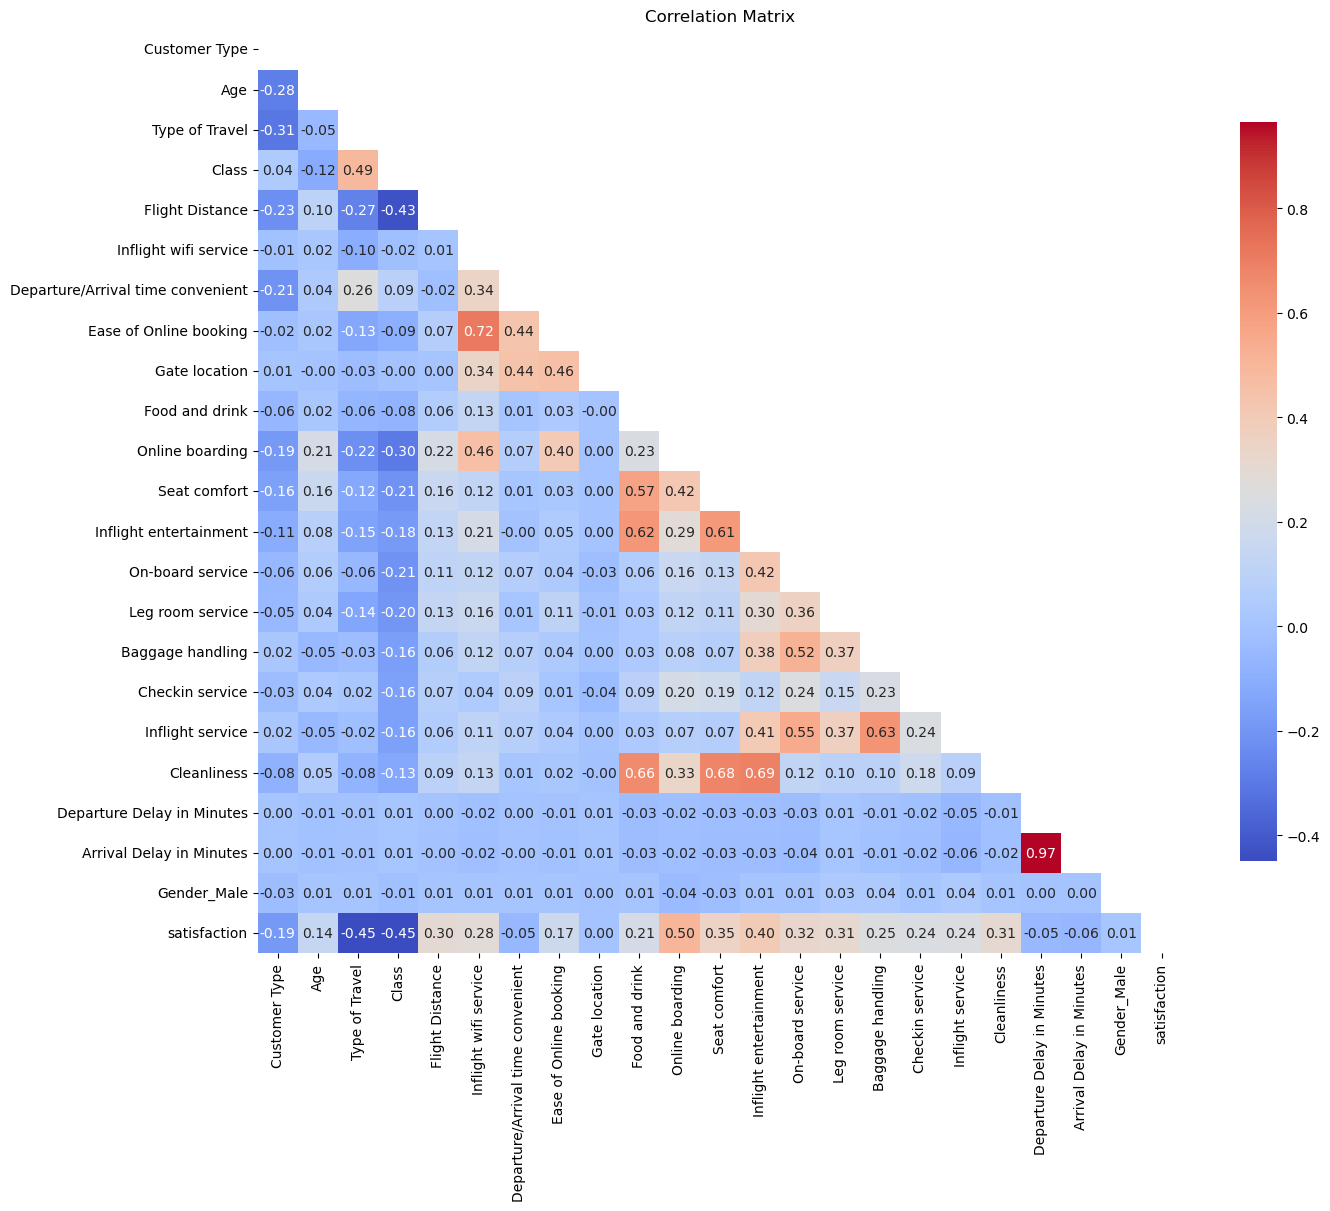

In [22]:
df = df[[col for col in df.columns if col != 'satisfaction'] + ['satisfaction']]

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 12))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [23]:
from sklearn.preprocessing import PowerTransformer

numerical_cols = df.select_dtypes(include=[np.number]).columns
skewed_cols = df[numerical_cols].apply(lambda x: x.skew()).abs()
skewed_cols = skewed_cols[skewed_cols > 0.5].index

def transform_skewed(df, method="log"):
    df_transformed = df.copy()
    
    if method == "log":
        for col in skewed_cols:
            df_transformed[col] = np.log1p(df_transformed[col])
    elif method == "sqrt":
        for col in skewed_cols:
            df_transformed[col] = np.sqrt(df_transformed[col])
    elif method == "yeo-johnson":
        pt = PowerTransformer(method="yeo-johnson")
        df_transformed[skewed_cols] = pt.fit_transform(df_transformed[skewed_cols])

    return df_transformed

df = transform_skewed(df, method="yeo-johnson")


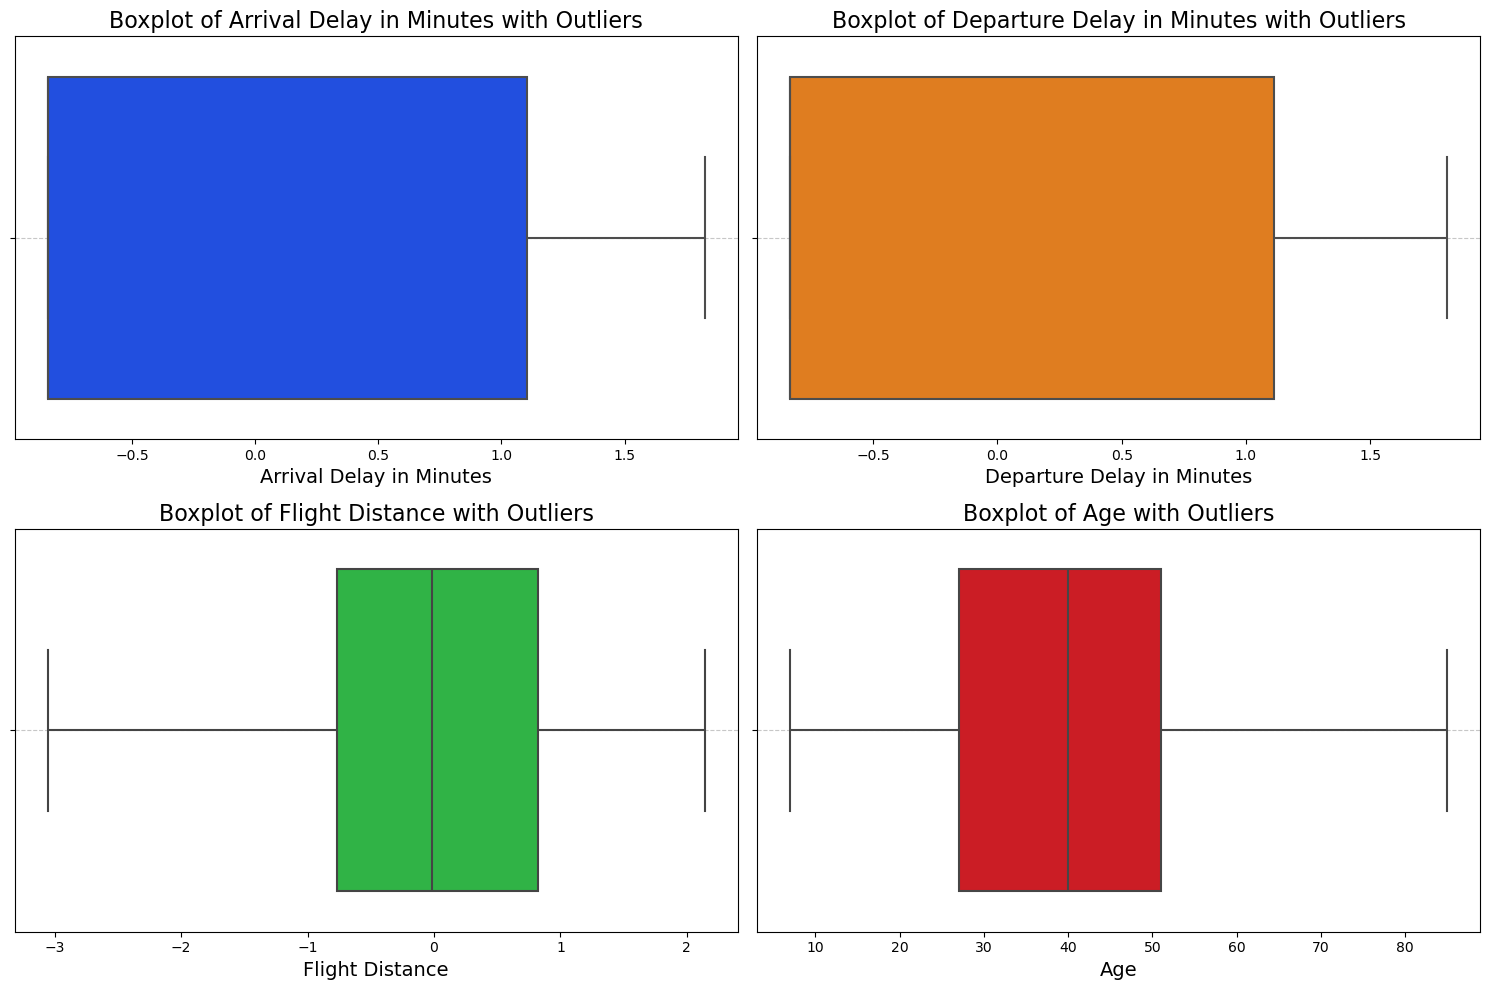

In [24]:
features = df[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age', 'satisfaction']]


palette = sns.color_palette('bright', n_colors=len(features.columns)-1)

Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))

plt.figure(figsize=(15, 10))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=features[column], color=palette[i-1], fliersize=5, linewidth=1.5)
    plt.title(f'Boxplot of {column} with Outliers', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Feature Engineering


### Interaction Features


In [25]:
def age_group(df):
    bins = [7, 18, 30, 40, 50, 60, 70, 80, 85]
    labels = ['7-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-85']
    df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
    df = df.drop(columns=['Age'])
    df = pd.get_dummies(df, columns=['age_group'], prefix='age')
    return df
df = age_group(df)

In [26]:
df.columns.tolist()

['Customer Type',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Gender_Male',
 'satisfaction',
 'age_7-17',
 'age_18-29',
 'age_30-39',
 'age_40-49',
 'age_50-59',
 'age_60-69',
 'age_70-79',
 'age_80-85']

In [ ]:
from itertools import combinations

def feature_engineer(df):
    columns = ['Online boarding', 'Inflight wifi service', 'Inflight service', 'Type of Travel']
    new_columns = []

    for feature1, feature2 in combinations(columns, 2):
        if feature1 != 'satisfaction' and feature2 != 'satisfaction':
            interaction_feature_name = f"{feature1}_x_{feature2}"
            new_column = (df[feature1] + df[feature2])
            new_columns.append(pd.Series(new_column, name=interaction_feature_name))

    df = pd.concat([df] + new_columns, axis=1)
    return df

df = feature_engineer(df)

In [28]:
def remove_collinearity_with_target(df, target_col, high_threshold=0.90, low_threshold=0.3):
    X = df.drop(columns=[target_col])
    target_corr = X.corrwith(df[target_col]).abs()  
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = set()

    for col in X.columns:
        if target_corr[col] < low_threshold:
            to_drop.add(col)
            continue  

        for feat in upper.index[upper[col] > high_threshold]:  
            if target_corr[col] < target_corr[feat]:  
                to_drop.add(col)
                break

    return df.drop(columns=list(to_drop))

# df = remove_collinearity_with_target(df, 'satisfaction', low_threshold=0.15, high_threshold=0.80)

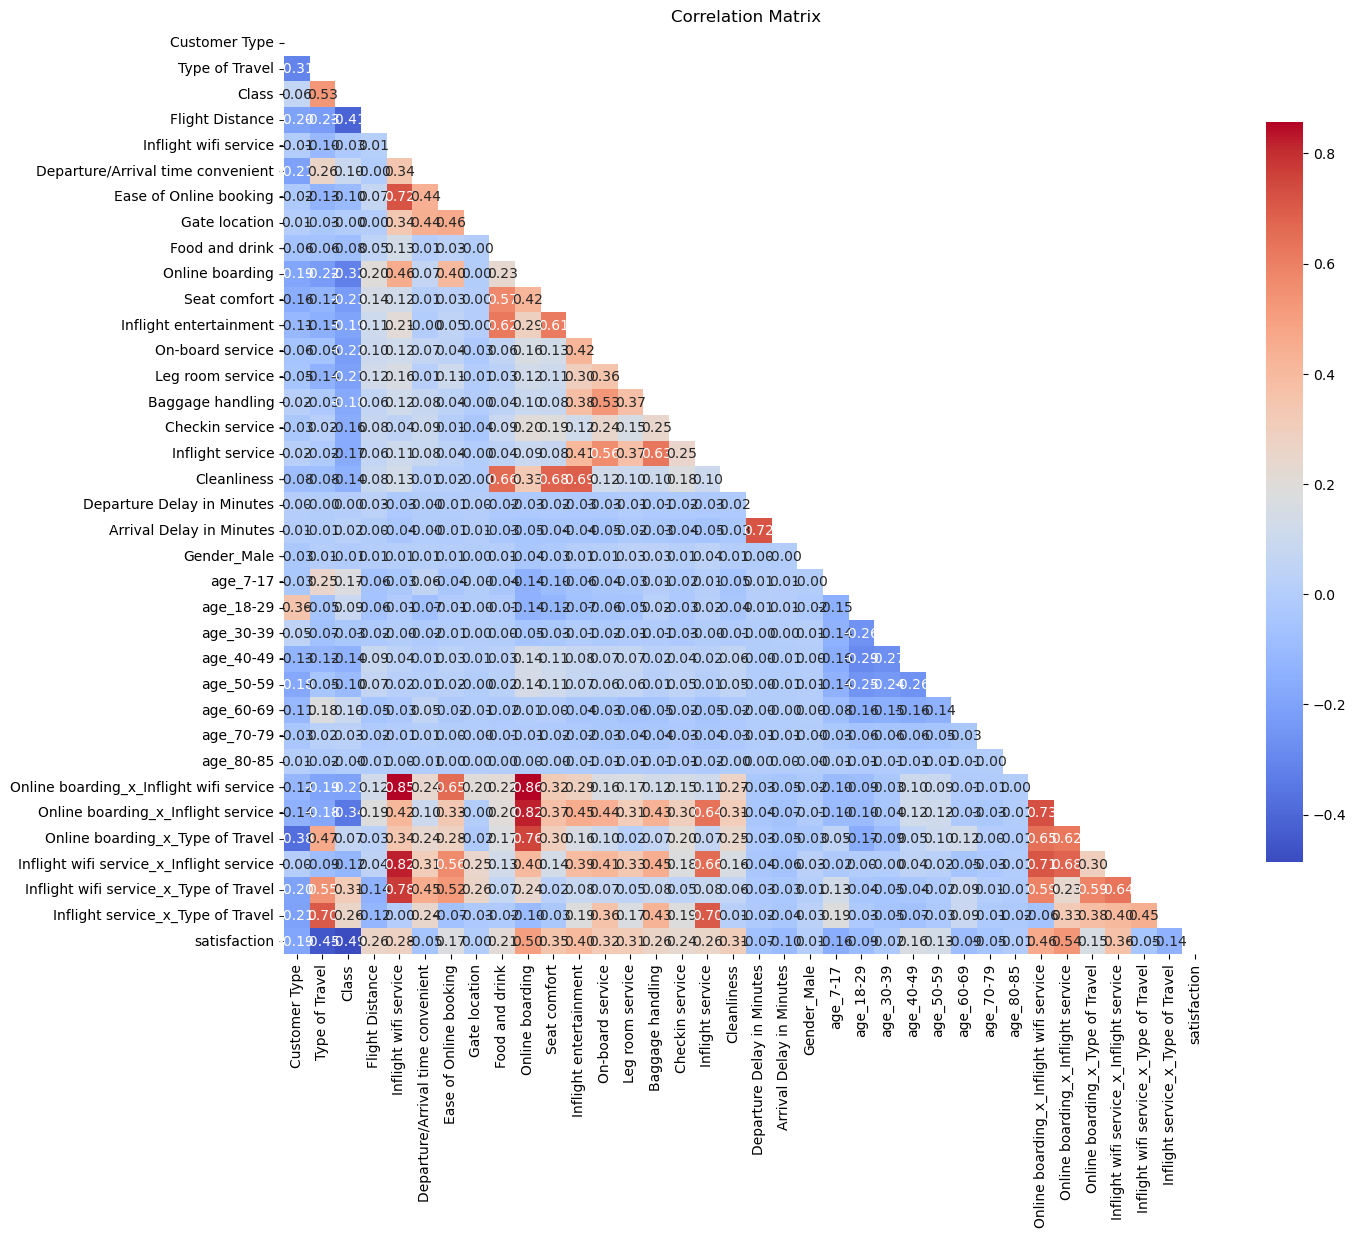

In [29]:
df = df[[col for col in df.columns if col != 'satisfaction'] + ['satisfaction']]

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 12))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

baseline_model = LogisticRegression(random_state=42, max_iter=100000)
baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:, 1])
report = classification_report(y_test, y_pred)

print(f"Baseline Model Accuracy: {accuracy:.4f}")
print(f"Baseline Model ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(report)

Baseline Model Accuracy: 0.8759
Baseline Model ROC AUC: 0.9253

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11740
           1       0.87      0.84      0.85      8979

    accuracy                           0.88     20719
   macro avg       0.88      0.87      0.87     20719
weighted avg       0.88      0.88      0.88     20719



In [31]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, r2_score

# cb_params = {'iterations': 476, 'learning_rate': 0.043757186100119284, 'depth': 10, 'l2_leaf_reg': 3.398402305277832}
# lgbm_params = {'max_depth': 7, 'num_leaves': 22, 'min_child_samples': 46, 'learning_rate': 0.04350246077224649, 'n_estimators': 414, 'reg_alpha': 0.0014685550686857323, 'reg_lambda': 3.957000009512791e-07, 'colsample_bytree': 0.9454161549874134, 'subsample': 0.5489656119013585, 'is_unbalance': False}
# xgb_params = {'max_depth': 15, 'learning_rate': 0.02270892971085817, 'min_child_weight': 1.4634453655046655, 'subsample': 0.9411317654956244, 'colsample_bytree': 0.9217563542510374, 'gamma': 2.061375285385118, 'n_estimators': 345}
models = {
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(random_seed=42, verbose=False)
}

predictions = {}
for name, model in models.items():
    print(f"\n{'-'*50}")
    print(f"{name} Results:")
    model.fit(X_train, y_train)
    
    predictions[name] = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, predictions[name]):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, predictions[name]):.4f}")
    print(f"R2 Score: {r2_score(y_test, predictions[name]):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, predictions[name], digits=3))


--------------------------------------------------
XGBoost Results:
Accuracy: 0.9638
ROC AUC: 0.9617
R2 Score: 0.8526

Classification Report:
              precision    recall  f1-score   support

           0      0.959     0.978     0.968     11740
           1      0.970     0.946     0.958      8979

    accuracy                          0.964     20719
   macro avg      0.965     0.962     0.963     20719
weighted avg      0.964     0.964     0.964     20719


--------------------------------------------------
LightGBM Results:
Accuracy: 0.9631
ROC AUC: 0.9605
R2 Score: 0.8496

Classification Report:
              precision    recall  f1-score   support

           0      0.956     0.980     0.968     11740
           1      0.973     0.941     0.957      8979

    accuracy                          0.963     20719
   macro avg      0.964     0.961     0.962     20719
weighted avg      0.963     0.963     0.963     20719


--------------------------------------------------
CatBoos

In [32]:
models_comparison = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': [accuracy_score(y_test, predictions[model]) for model in models.keys()],
    'ROC AUC': [roc_auc_score(y_test, predictions[model]) for model in models.keys()],
    'R2 score': [r2_score(y_test, predictions[model]) for model in models.keys()]
})
models_comparison = models_comparison.sort_values('Accuracy', ascending=False)

print("\n" + "="*50)
print("Models Comparison:")
print(models_comparison.to_string(index=False))


Models Comparison:
   Model  Accuracy  ROC AUC  R2 score
CatBoost  0.965346 0.963122  0.858877
 XGBoost  0.963801 0.961667  0.852588
LightGBM  0.963077 0.960531  0.849639


```
Models Comparison:
   Model  Accuracy  ROC AUC  R2 score
CatBoost  0.963608 0.961392  0.851801
LightGBM  0.963077 0.960622  0.849639
 XGBoost  0.962498 0.960347  0.847281

0:	learn: 0.5912157	total: 21.4ms	remaining: 10.7s
200:	learn: 0.0834738	total: 5.57s	remaining: 8.29s
400:	learn: 0.0684719	total: 10.8s	remaining: 2.66s
499:	learn: 0.0632302	total: 13.5s	remaining: 0us


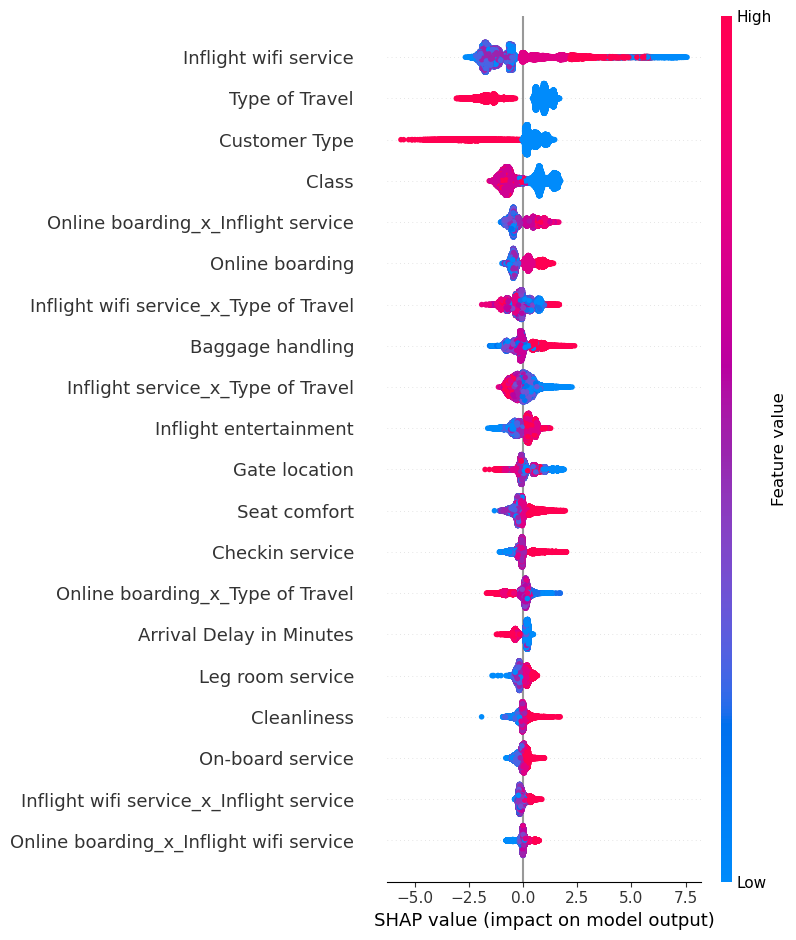

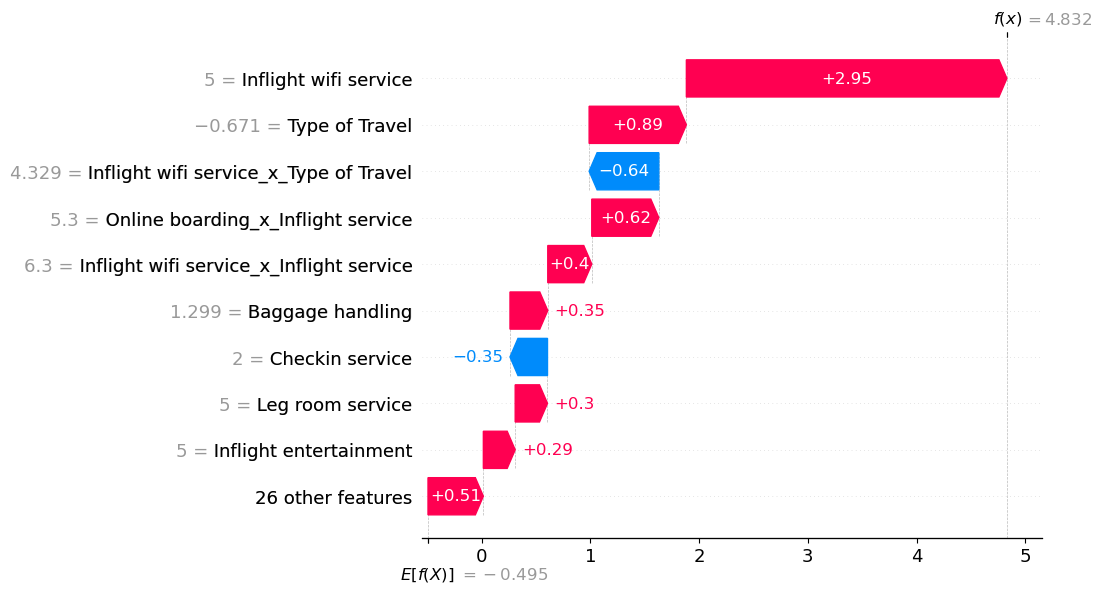

In [33]:
import shap
from catboost import CatBoostClassifier, Pool

categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

for col in categorical_cols:
    df[col] = df[col].astype(str)

from sklearn.model_selection import train_test_split
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_pool = Pool(X_train, label=y_train, cat_features=categorical_cols)
test_pool = Pool(X_test, label=y_test, cat_features=categorical_cols)

model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=8, verbose=200)
model.fit(train_pool)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

shap.plots.waterfall(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_test.iloc[0]))

[I 2025-03-27 23:56:38,780] A new study created in memory with name: no-name-93250115-6dad-4392-aad0-ca698ec12b05
[I 2025-03-27 23:56:46,179] Trial 0 finished with value: 0.9438269625433641 and parameters: {'depth': 5, 'learning_rate': 0.01693365085852531, 'l2_leaf_reg': 3.331432703755618, 'subsample': 0.9495437067874699}. Best is trial 0 with value: 0.9438269625433641.
[I 2025-03-27 23:56:48,855] Trial 1 finished with value: 0.9302945169641091 and parameters: {'depth': 6, 'learning_rate': 0.0010602689040665333, 'l2_leaf_reg': 4.264484323705235, 'subsample': 0.7842258130642812}. Best is trial 0 with value: 0.9438269625433641.
[I 2025-03-27 23:56:51,711] Trial 2 finished with value: 0.9310614199972964 and parameters: {'depth': 7, 'learning_rate': 0.00149588567559817, 'l2_leaf_reg': 3.117868078313674, 'subsample': 0.5886102077756512}. Best is trial 0 with value: 0.9438269625433641.
[I 2025-03-27 23:56:54,565] Trial 3 finished with value: 0.9468744754365931 and parameters: {'depth': 5, 'l

Best Parameters: {'depth': 4, 'learning_rate': 0.17244137403542156, 'l2_leaf_reg': 3.258820179105591, 'subsample': 0.7977884243064802}

Model Performance:
accuracy: 0.9590231188763937
roc_auc: 0.9936717901110541
avg_precision: 0.9926804007650483
classification_report:               precision    recall  f1-score   support

           0       0.96      0.97      0.96     11740
           1       0.96      0.94      0.95      8979

    accuracy                           0.96     20719
   macro avg       0.96      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



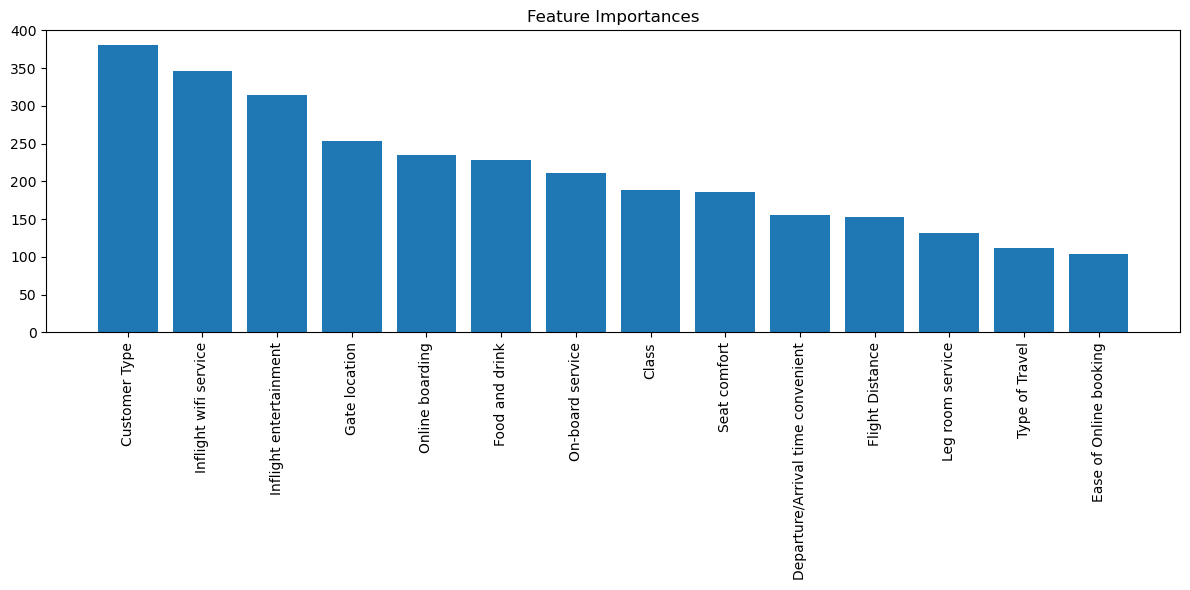

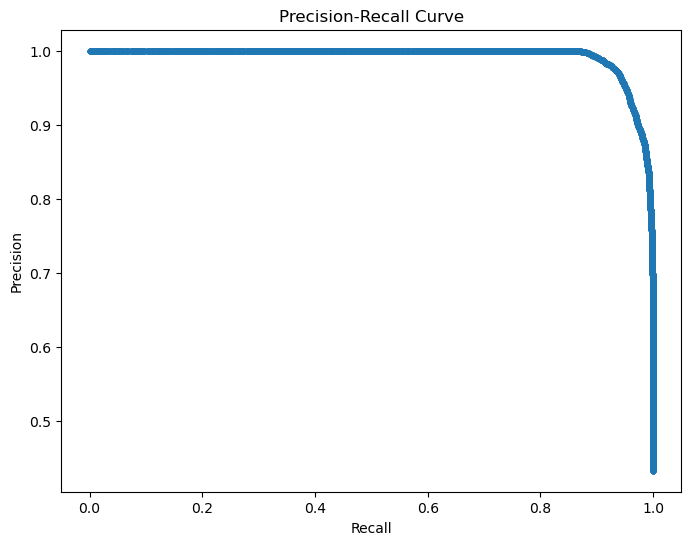

In [ ]:
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.pipeline import Pipeline

def preprocess_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(
        X, y, 
        test_size=test_size, 
        stratify=y, 
        random_state=random_state
    )

def objective_lightgbm(trial, X_train, y_train):
    params = {
        # 'iterations': trial.suggest_int('iterations', 50, 1000),
        'depth': trial.suggest_int('depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.5, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 5),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
    }
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LGBMClassifier(
            **params, 
            random_state=42, 
            n_jobs=-1,
            class_weight='balanced'
        ))
    ])
    
    scores = cross_val_score(
        pipeline, 
        X_train, 
        y_train, 
        cv=cv, 
        scoring='balanced_accuracy',
        n_jobs=-1
    )
    
    return np.mean(scores)

def train_lightgbm(X_train, y_train, n_trials=100):
    study = optuna.create_study(direction='maximize')
    
    study.optimize(
        lambda trial: objective_lightgbm(trial, X_train, y_train), 
        n_trials=n_trials
    )
    
    best_params = study.best_params
    print("Best Parameters:", best_params)
    
    final_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LGBMClassifier(
            **best_params, 
            random_state=42, 
            n_jobs=-1,
            class_weight='balanced'
        ))
    ])
    
    final_pipeline.fit(X_train, y_train)
    
    return best_params, final_pipeline

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba),
        'avg_precision': average_precision_score(y_test, y_pred_proba),
        'classification_report': classification_report(y_test, y_pred)
    }
    
    return metrics

def plot_feature_importance(model, feature_names):
    importances = model.named_steps['classifier'].feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

def plot_precision_recall_curve(y_test, y_pred_proba):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

def main(X, y, feature_names):
    X = pd.DataFrame(X)
    y = pd.Series(y)
    
    X_train, X_test, y_train, y_test = preprocess_data(X, y)
    
    best_params, model = train_lightgbm(X_train, y_train, 300)
    
    metrics = evaluate_model(model, X_test, y_test)
    
    print("\nModel Performance:")
    for key, value in metrics.items():
        print(f"{key}: {value}")
    
    plot_feature_importance(model, feature_names)
    plot_precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    
    return model, metrics, best_params

model, metrics, best_params = main(X, y, feature_names=df.columns.tolist())
# This took 13 minutes 16.2 seconds

0:	learn: 0.8861780	test: 0.8858053	best: 0.8858053 (0)	total: 15.9ms	remaining: 15.8s
200:	learn: 0.9571765	test: 0.9561272	best: 0.9563203 (192)	total: 2.99s	remaining: 11.9s
400:	learn: 0.9607843	test: 0.9583957	best: 0.9585887 (380)	total: 5.93s	remaining: 8.85s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.958588735
bestIteration = 380

Shrink model to first 381 iterations.


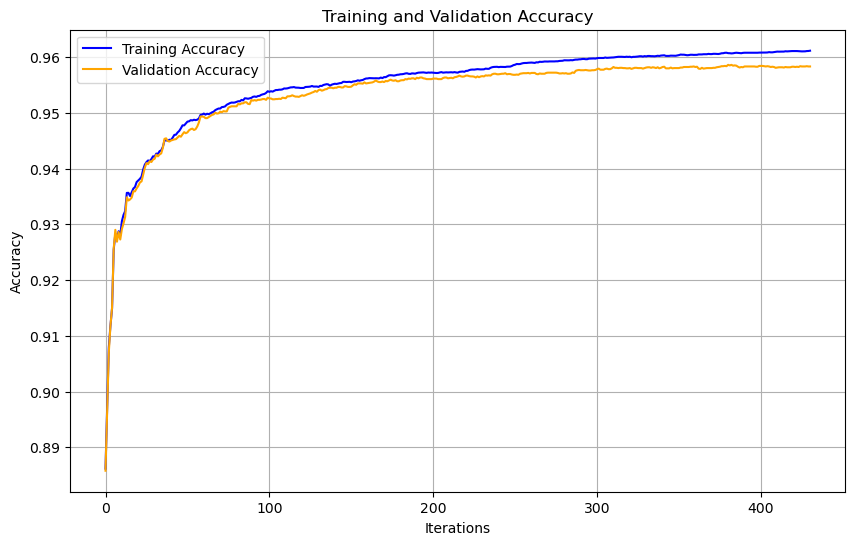

Accuracy: 0.9585887349775568
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11740
           1       0.97      0.94      0.95      8979

    accuracy                           0.96     20719
   macro avg       0.96      0.96      0.96     20719
weighted avg       0.96      0.96      0.96     20719



In [97]:
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, classification_report

# Parameters found from Optuna tuning
cb_params = {'depth': 4, 'learning_rate': 0.17244137403542156, 'l2_leaf_reg': 3.258820179105591, 'subsample': 0.7977884243064802}

model = CatBoostClassifier(
    **cb_params,
    loss_function="Logloss",
    eval_metric="Accuracy",
    random_seed=42,
    verbose=200 
)

model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=50, use_best_model=True)

evals_result = model.get_evals_result()

plt.figure(figsize=(10, 6))
plt.plot(evals_result['learn']['Accuracy'], label='Training Accuracy', color='blue')
plt.plot(evals_result['validation']['Accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [98]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_list, roc_auc_list = [], []
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy_list.append(accuracy_score(y_test, y_pred))
    roc_auc_list.append(roc_auc_score(y_test, y_pred))

print("Cross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.4f}")
print(f"ROC AUC: {np.mean(roc_auc_list):.4f} ± {np.std(roc_auc_list):.4f}")

0:	learn: 0.8856833	total: 12.6ms	remaining: 12.6s
200:	learn: 0.9576953	total: 2.46s	remaining: 9.79s
400:	learn: 0.9608446	total: 4.84s	remaining: 7.23s
600:	learn: 0.9625098	total: 7.22s	remaining: 4.79s
800:	learn: 0.9640181	total: 9.6s	remaining: 2.38s
999:	learn: 0.9651523	total: 12.1s	remaining: 0us
0:	learn: 0.8870588	total: 15.7ms	remaining: 15.7s
200:	learn: 0.9578401	total: 3.08s	remaining: 12.3s
400:	learn: 0.9614238	total: 6.19s	remaining: 9.25s
600:	learn: 0.9633062	total: 9.3s	remaining: 6.17s
800:	learn: 0.9645611	total: 12.3s	remaining: 3.07s
999:	learn: 0.9651885	total: 15.4s	remaining: 0us
0:	learn: 0.8863831	total: 15.3ms	remaining: 15.3s
200:	learn: 0.9577677	total: 4.38s	remaining: 17.4s
400:	learn: 0.9614721	total: 7.89s	remaining: 11.8s
600:	learn: 0.9631373	total: 11.3s	remaining: 7.51s
800:	learn: 0.9644766	total: 14.9s	remaining: 3.7s
999:	learn: 0.9655264	total: 18.4s	remaining: 0us
0:	learn: 0.8857074	total: 18ms	remaining: 18s
200:	learn: 0.9567059	total: 

## Complete Pipeline for Deployment

In [100]:
def pipeline(df):
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    df = df.dropna()
    df = df.drop(columns=['Unnamed: 0', 'id'])

    cat_cols = ['Type of Travel', 'Customer Type', 'Class', 'satisfaction']
    oh_col = ['Gender']

    encoding_dict = {}
    le = LabelEncoder()
    oh = OneHotEncoder(sparse_output=False, drop='first')

    for col in cat_cols:
        df[col] = le.fit_transform(df[col].astype(str))
        encoding_dict[col] = dict(zip(le.classes_, range(len(le.classes_))))

    encoded_data = oh.fit_transform(df[oh_col])
    encoded_df = pd.DataFrame(encoded_data, columns=oh.get_feature_names_out(oh_col))

    df = df.drop(columns=oh_col).reset_index(drop=True)
    df = pd.concat([df, encoded_df], axis=1)

    print("\nEncoding Mappings:")
    for col, mapping in encoding_dict.items():
        print(f"{col}: {mapping}")

    from sklearn.preprocessing import PowerTransformer

    numerical_cols = df.select_dtypes(include=[np.number]).columns
    skewed_cols = df[numerical_cols].apply(lambda x: x.skew()).abs()
    skewed_cols = skewed_cols[skewed_cols > 0.5].index

    def transform_skewed(df, method="log"):
        df_transformed = df.copy()
        
        if method == "log":
            for col in skewed_cols:
                df_transformed[col] = np.log1p(df_transformed[col])
        elif method == "sqrt":
            for col in skewed_cols:
                df_transformed[col] = np.sqrt(df_transformed[col])
        elif method == "yeo-johnson":
            pt = PowerTransformer(method="yeo-johnson")
            df_transformed[skewed_cols] = pt.fit_transform(df_transformed[skewed_cols])

        return df_transformed
    
    def age_group(df):
        bins = [7, 18, 30, 40, 50, 60, 70, 80, 85]
        labels = ['7-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-85']
        df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
        df = df.drop(columns=['Age'])
        df = pd.get_dummies(df, columns=['age_group'], prefix='age')
        return df
    df = age_group(df)

    from itertools import combinations

    def feature_engineer(df):
        columns = ['Online boarding', 'Inflight wifi service', 'Inflight service', 'Type of Travel']
        new_columns = []

        for feature1, feature2 in combinations(columns, 2):
            if feature1 != 'satisfaction' and feature2 != 'satisfaction':
                interaction_feature_name = f"{feature1}_x_{feature2}"
                new_column = (df[feature1] + df[feature2])
                new_columns.append(pd.Series(new_column, name=interaction_feature_name))

        df = pd.concat([df] + new_columns, axis=1)
        return df

    df = transform_skewed(df, method="yeo-johnson")
    df = feature_engineer(df)

    return df

test_df = pd.read_csv('test.csv')
test_df = pipeline(test_df)


Encoding Mappings:
Type of Travel: {'Business travel': 0, 'Personal Travel': 1}
Customer Type: {'Loyal Customer': 0, 'disloyal Customer': 1}
Class: {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
satisfaction: {'neutral or dissatisfied': 0, 'satisfied': 1}


In [101]:
X = test_df.drop(columns=['satisfaction'])
y = test_df['satisfaction']
y_pred = model.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

Accuracy: 0.9585216081566447
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14528
           1       0.97      0.94      0.95     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



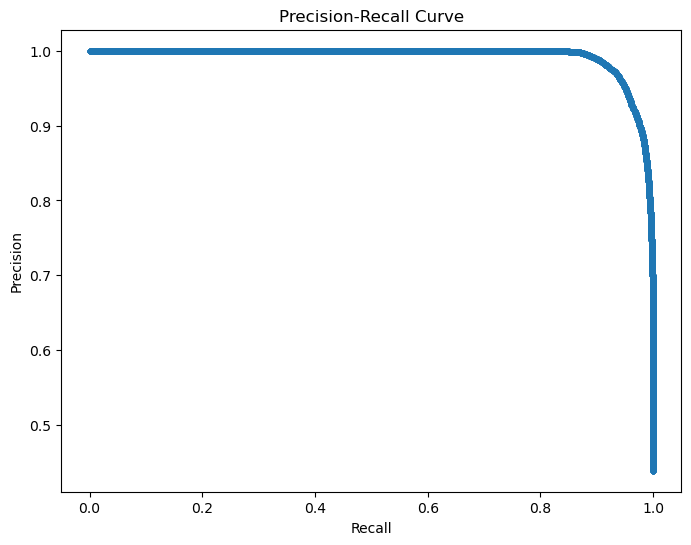

In [106]:
def plot_precision_recall_curve(y_test, y_pred_proba):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
plot_precision_recall_curve(y, model.predict_proba(X)[:, 1])

## Conclusion
The analysis provides insights into factors affecting passenger satisfaction and demonstrates the effectiveness of various machine learning models in predicting satisfaction levels.


## Key Findings
- Feature importance analysis
- Model performance comparison
- Insights into key drivers of passenger satisfaction


## Recommendations
1. Focus on reducing delays
2. Improve in-flight services
3. Enhance customer experience based on key features


## Technologies Used
- Python
- Pandas
- NumPy
- Scikit-learn
- XGBoost
- LightGBM
- CatBoost
- Seaborn
- Matplotlib